## ***CHURNING CUSTOMERS IN A TELECOMS COMPANY***

**IMPORTATION OF NECCESSARY LIBRARIES AND MOUNTING OF** **DRIVE**

In [251]:
# Installation of required packages
!pip install tensorflow scikeras scikit-learn
!pip install keras-tuner

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning libraries
import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import (KFold, GridSearchCV, train_test_split, cross_val_score, StratifiedKFold)
from sklearn.impute import SimpleImputer
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, accuracy_score, make_scorer)
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Keras
import keras
import keras_tuner
from kerastuner import Objective
from kerastuner.tuners import RandomSearch
from keras.models import Model
from scikeras.wrappers import KerasClassifier
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Additional Libraries
from google.colab import drive

In [252]:
# Mounts the Google Drive to the specified directory '/content/drive'
# This allows access to files and data stored in your Google Drive within the Colab environment
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***DATA COLLECTION***

In [253]:
# Reasa CSV file into a Pandas DataFrame
# The file 'player_21.csv' is located in the specified Google Drive directory and is loaded into the variabe 'first_dataset' for further data analysis
dataset = pd.read_csv('/content/drive/MyDrive/CustomerChurn_dataset.csv')

In [254]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [255]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*DEFINING AND DROPPING FEATURES WITH MORE THAN **30%** OF THE DATA MISSING*

In [256]:
# Define the percentage threshold
percentage = 30

# Calculating the percentage of missing values in each of the columns
missing_percentage_per_each_column = (dataset.isnull().sum() / len(dataset)) * 100

# Drop columns exceeding the threshold
drop_columns = missing_percentage_per_each_column[missing_percentage_per_each_column > percentage].index
dataset.drop(columns = drop_columns, inplace = True)

In [257]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [258]:
# Analyzing the new DataFrame
dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***FEATURE ENGINEERING & FEATURE IMPORTANCE***

In [259]:
# Non-numeric Splitting (Imputing for Categorical Values)
categorical_columns = dataset.select_dtypes(exclude = ['number'])
categorical_columns.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  TotalCharges      7043 non-null   object
 17  Churn         

In [260]:
# Numeric Splitting (Imputing for Numerical Values)
numeric_columns = dataset.select_dtypes(include = ['number'])
numeric_columns.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


***IMPUTATION AND ENCODING***

In [261]:
# Encoding the Object Values to numeric Data Types
# Using Label Encoder
label_encoder = LabelEncoder()

# Encoding the Categorical Values
for column in categorical_columns.columns:
  categorical_columns[column] = label_encoder.fit_transform(categorical_columns[column])
categorical_columns.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1


In [262]:
# Combining the two DataFrame
combined_dataset = pd.concat([categorical_columns, numeric_columns], axis = 1)
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   int64  
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   int64  
 16  TotalCharges      7043 non-null   int64  


In [263]:
combined_dataset.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,SeniorCitizen,tenure,MonthlyCharges
0,5375,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,2505,0,0,1,29.85
1,3962,1,0,0,1,0,0,2,0,2,...,0,0,1,0,3,1466,0,0,34,56.95
2,2564,1,0,0,1,0,0,2,2,0,...,0,0,0,1,3,157,1,0,2,53.85
3,5535,1,0,0,0,1,0,2,0,2,...,0,0,1,0,0,1400,0,0,45,42.30
4,6511,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,925,1,0,2,70.70


In [264]:
# Split target and feature variables
X = combined_dataset.drop("Churn", axis = 1)
y = combined_dataset["Churn"]

In [265]:
# Scaling the data values (to train)
scaling = StandardScaler()
data_scaled = scaling.fit_transform(X)

# Transorm it into a DataFrame
X = pd.DataFrame(data_scaled, columns = X.columns)
X.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,SeniorCitizen,tenure,MonthlyCharges
0,0.911890,-1.009559,1.034530,-0.654012,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-0.398608,-0.439916,-1.277445,-1.160323
1,0.216906,0.990532,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.948762,-0.439916,0.066327,-0.259629
2,-0.470701,0.990532,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-1.641883,-0.439916,-1.236724,-0.362660
3,0.990587,0.990532,-0.966622,-0.654012,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.983710,-0.439916,0.514251,-0.746535
4,1.470632,-1.009559,-0.966622,-0.654012,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.235224,-0.439916,-1.236724,0.197365


In [266]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   float64
 1   gender            7043 non-null   float64
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   PhoneService      7043 non-null   float64
 5   MultipleLines     7043 non-null   float64
 6   InternetService   7043 non-null   float64
 7   OnlineSecurity    7043 non-null   float64
 8   OnlineBackup      7043 non-null   float64
 9   DeviceProtection  7043 non-null   float64
 10  TechSupport       7043 non-null   float64
 11  StreamingTV       7043 non-null   float64
 12  StreamingMovies   7043 non-null   float64
 13  Contract          7043 non-null   float64
 14  PaperlessBilling  7043 non-null   float64
 15  PaymentMethod     7043 non-null   float64
 16  TotalCharges      7043 non-null   float64


In [267]:
# Splitting the dataset for training and testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [268]:
# Train the model
rfc_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

***TRAINING THE MODEL USING FEATURE IMPORTANCE***

In [269]:
# Obtaining important features
labeled_feature = X.columns
feature_importance = rfc_model.feature_importances_

# Feature Importance Sorting
feature_importance_dataset = pd.DataFrame({"Feature Displayed": labeled_feature, "Importance": feature_importance})

# Sorted Features (in Descending Order)
feature_importance_dataset = feature_importance_dataset.sort_values(by="Importance", ascending=False)
feature_importance_dataset



,Feature Displayed,Importance
18,tenure,0.159878
19,MonthlyCharges,0.144721
16,TotalCharges,0.133221
0,customerID,0.129086
13,Contract,0.076735
7,OnlineSecurity,0.046862
15,PaymentMethod,0.044742
10,TechSupport,0.039537
6,InternetService,0.026091
8,OnlineBackup,0.023920


Index(['Feature Displayed', 'Importance'], dtype='object')


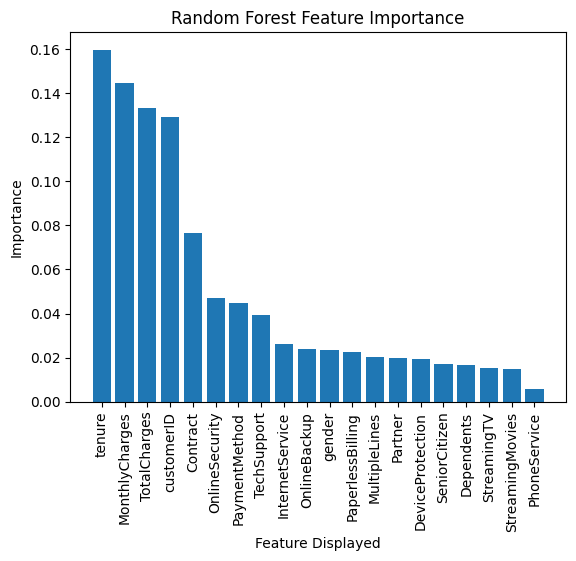

In [270]:
# Check the column names in feature_importance_dataset
print(feature_importance_dataset.columns)

# Update the column names in the plot accordingly
plt.bar(feature_importance_dataset['Feature Displayed'], feature_importance_dataset['Importance'])
plt.xlabel("Feature Displayed")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.xticks(rotation="vertical")
plt.show()

In [271]:
# Set a threshold for feature importance
threshold = 0.02

# Select features with importance greater than the threshold
important_features = X.columns[feature_importance > threshold]

# Create a new DataFrame with only the selected important features
X_selected = X[important_features]

# Display the selected features
X_selected



,customerID,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,tenure,MonthlyCharges
0,0.911890,-1.009559,0.062723,-1.183234,-0.918838,1.242550,-0.925262,-0.828207,0.829798,0.398558,-0.398608,-1.277445,-1.160323
1,0.216906,0.990532,-0.991588,-1.183234,1.407321,-1.029919,-0.925262,0.371271,-1.205113,1.334863,-0.948762,0.066327,-0.259629
2,-0.470701,0.990532,-0.991588,-1.183234,1.407321,1.242550,-0.925262,-0.828207,0.829798,1.334863,-1.641883,-1.236724,-0.362660
3,0.990587,0.990532,0.062723,-1.183234,1.407321,-1.029919,1.396299,0.371271,-1.205113,-1.474052,-0.983710,0.514251,-0.746535
4,1.470632,-1.009559,-0.991588,0.172250,-0.918838,-1.029919,-0.925262,-0.828207,0.829798,0.398558,-1.235224,-1.236724,0.197365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655145,0.990532,1.117034,-1.183234,1.407321,-1.029919,1.396299,0.371271,0.829798,1.334863,-0.879397,-0.340876,0.665992
7039,-0.981733,-1.009559,1.117034,0.172250,-0.918838,1.242550,-0.925262,0.371271,0.829798,-0.537747,1.292099,1.613701,1.277533
7040,-0.075745,-1.009559,0.062723,-1.183234,1.407321,-1.029919,-0.925262,-0.828207,0.829798,0.398558,-0.139680,-0.870241,-1.168632
7041,1.186835,0.990532,1.117034,0.172250,-0.918838,-1.029919,-0.925262,-0.828207,0.829798,1.334863,-0.316534,-1.155283,0.320338


In [272]:
X = X_selected

In [273]:
# Standardize the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# **EXPLORATORY DATA ANALYSIS AND DATA PREPROCESSING**

In [274]:
# Printing the shape of the dataset
print ("The shape of the dataset : ", X_selected.shape)

The shape of the dataset :  (7043, 13)


In [275]:
# Display descriptive statistics for the DataFrame
print(X_selected.describe())

         customerID        gender  MultipleLines  InternetService  \
count  7.043000e+03  7.043000e+03   7.043000e+03     7.043000e+03   
mean  -1.008864e-18 -2.219500e-17  -1.513296e-17     8.575342e-18   
std    1.000071e+00  1.000071e+00   1.000071e+00     1.000071e+00   
min   -1.731805e+00 -1.009559e+00  -9.915883e-01    -1.183234e+00   
25%   -8.659024e-01 -1.009559e+00  -9.915883e-01    -1.183234e+00   
50%    0.000000e+00  9.905318e-01   6.272275e-02     1.722502e-01   
75%    8.659024e-01  9.905318e-01   1.117034e+00     1.722502e-01   
max    1.731805e+00  9.905318e-01   1.117034e+00     1.527734e+00   

       OnlineSecurity  OnlineBackup   TechSupport      Contract  \
count    7.043000e+03  7.043000e+03  7.043000e+03  7.043000e+03   
mean     6.809830e-17  2.295165e-17 -3.127478e-17 -7.566478e-17   
std      1.000071e+00  1.000071e+00  1.000071e+00  1.000071e+00   
min     -9.188378e-01 -1.029919e+00 -9.252621e-01 -8.282069e-01   
25%     -9.188378e-01 -1.029919e+00 -9.2526

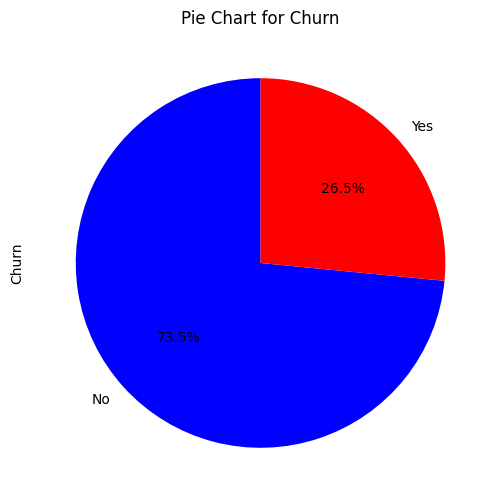

In [276]:
# Pie Chart for a single categorical variable
plt.figure(figsize = (6, 6))
dataset["Churn"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", startangle = 90, colors = ["blue", "red"])
plt.title("Pie Chart for Churn")
plt.show()

*The pie chart above illustrates that less customers who have stayed longer with the company are less likely to move to another company (Churn)*

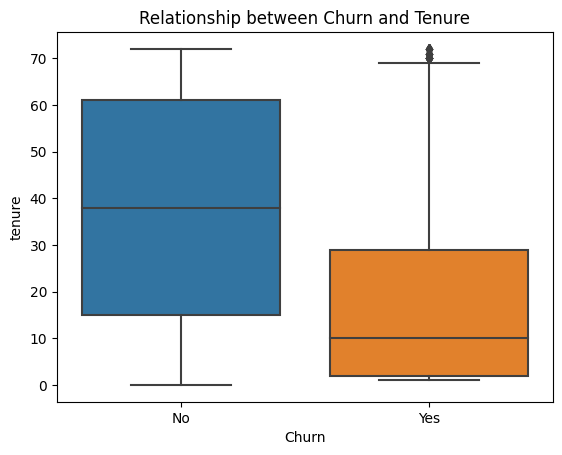

In [277]:
# Assuming "dataset" is the DataFrame
sns.boxplot(x = "Churn", y = "tenure", data = dataset)
plt.title("Relationship between Churn and Tenure")
plt.show()

*The graph above illustrates the customers who have stayed longer with the company are less likely to move to another Company (Churn)*

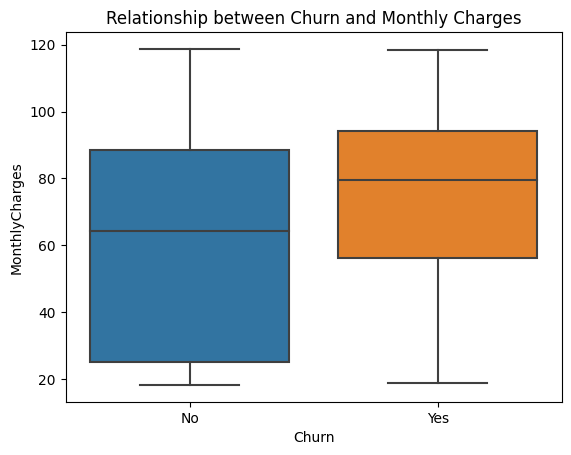

In [278]:
# Assuming "Dataset" is your DataFrame
sns.boxplot(x = "Churn", y = dataset["MonthlyCharges"], data = dataset)
plt.title("Relationship between Churn and Monthly Charges")
plt.show()

*The graph above suuggest that customers with Higher Monthly Charges are more liekly to move to another Company (Churn)*

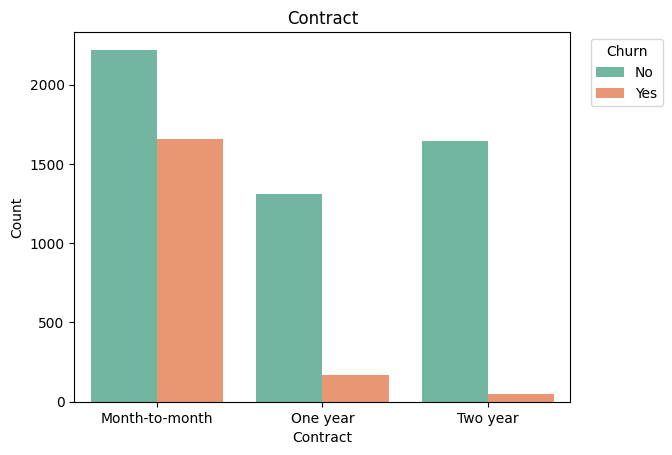

In [279]:
# List of categorical values for the 'Contract' variable
Categorical = ['One year', 'Two years', 'Month-to-month']

# Create a countplot to visualize the distribution of 'Churn' within each category of 'Contract'
sns.countplot(x=dataset["Contract"], hue=dataset["Churn"], palette="Set2")

# Add title and axis labels to the plot
plt.title("Contract")
plt.xlabel("Contract")
plt.ylabel("Count")

# Add a legend to show the relationship between colors and the 'Churn' variable
plt.legend(title="Churn", loc="upper right", bbox_to_anchor=(1.2, 1))

# Display the plot
plt.show()

*The graph above portrays customers that pay through **electric checks** are more likey to move to another company (churn) than those who pay via other methods. Thus, the customers who pay **month-to-month** will church quite a lot*

***MULTI-LAYER PERCEPTION MODEL USING FUNCTIONAL API***

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [281]:
# Function to create a Keras model using the functional API
def create_model(optimizer='adam', hidden_layer1_units=50, hidden_layer2_units=20):
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer_1 = Dense(hidden_layer1_units, activation ='relu')(input_layer)
    hidden_layer_2 = Dense(hidden_layer2_units, activation ='relu')(hidden_layer_1)
    output_layer = Dense(1, activation = 'sigmoid')(hidden_layer_2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss ='binary_crossentropy', metrics = ['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier
model = KerasClassifier(build_fn = create_model, epochs = 10, batch_size = 32, verbose = 0)

In [282]:
# Keras Functional API model
def create_model(optimizer = 'Adam', hidden_layer1_units = 64, hidden_layer2_units = 32):
  input_layer = Input(shape = (X_train.shape[1],))
  hidden_layer_1 = Dense(hidden_layer1_units, activation = 'relu')(input_layer)
  hidden_layer_2 = Dense(hidden_layer2_units, activation = 'relu')(hidden_layer_1)
  output_layer = Dense(1, activation = 'sigmoid')(hidden_layer_2)

  model = Model(inputs = input_layer, outputs = output_layer)
  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

  # Wrap the Keras model using KerasClassifier
model = KerasClassifier(model = create_model, epochs = 10, batch_size = 32, verbose = 0, hidden_layer1_units = 32, hidden_layer2_units = 16)

In [283]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor = "val_loss", restore_best_weights = True )

***Hyper paramter tunning using the Keras Tuner***

In [284]:
# Define a parameter grid for grid search
param_grid = {
    'optimizer':['adam','sgd','rmsprop'],
    'hidden_layer1_units':[50,100,150],
    'hidden_layer2_units':[20,40,60]
}

auc_scorer = make_scorer(roc_auc_score, greater_is_better = True)
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = auc_scorer, cv = StratifiedKFold(n_splits = 5), verbose = 1, error_score = 'raise')

# Suppress TensorFlow warnings
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "tensorflow")

grid_result = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [285]:
print(f'Best Parameters: {grid_result.best_params_}')
print(f'Best AUC Score: {grid_result.best_score_}')

#Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred>0.5).astype(int)
accuracy_best = accuracy_score(y_test,y_pred_binary)
auc_score_best = roc_auc_score(y_test,y_pred)
print(f'Test Accuracy: {accuracy_best}')
print(f'AUC Score: {auc_score_best}')

Best Parameters: {'hidden_layer1_units': 150, 'hidden_layer2_units': 40, 'optimizer': 'sgd'}
Best AUC Score: 0.7208060510717574
Test Accuracy: 0.8119233498935415
AUC Score: 0.739994255074684


# ***MODEL OPTIMIZATION***

In [286]:
# Train and test the optimized model
optimized_model = grid_search.best_estimator_
optimized_model.fit(X_train, y_train)
optimized_accuracy = optimized_model.score(X_test, y_test)
optimized_auc_score = roc_auc_score(y_test, optimized_model.predict_proba(X_test)[:, 1])

# Print optimized results
print(f'Optimized Model Accuracy: {optimized_accuracy}')
print(f'Optimized AUC Score: {optimized_auc_score}')

Optimized Model Accuracy: 0.8090844570617459
Optimized AUC Score: 0.8551890649745877


***SAVING THE MODEL***

In [287]:
# Define the model using optimized hyperparameters

input_layer = Input(shape = (X_train.shape[1],))
hidden_layer_1 = Dense(128, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(32, activation = 'relu')(hidden_layer_1)
output_layer = Dense(1, activation = 'sigmoid')(hidden_layer_2)

optimized_model = Model(inputs = input_layer, outputs = output_layer)
optimized_model.compile(optimizer = RMSprop(learning_rate = 0.001, rho = 0.9), loss = 'binary_crossentropy', metrics = ['accuracy'])


optimized_model.fit(X_train, y_train, epochs = 10, batch_size = 32, verbose = 1)

y_optimized_pred = best_model.predict(X_test)
y_pred_optimized_binary = (y_pred > 0.5).astype(int)

optimized_accuracy = accuracy_score(y_test,y_pred_optimized_binary)
optimized_auc_score = roc_auc_score(y_test,y_optimized_pred)

Epoch 1/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4544 - accuracy: 0.7833
Epoch 2/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4238 - accuracy: 0.7966
Epoch 3/10
177/177 [==============================] - 1s 4ms/step - loss: 0.4183 - accuracy: 0.8017
Epoch 4/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4153 - accuracy: 0.8056
Epoch 5/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.8060
Epoch 6/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4089 - accuracy: 0.8094
Epoch 7/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4050 - accuracy: 0.8120
Epoch 8/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4033 - accuracy: 0.8092
Epoch 9/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4031 - accuracy: 0.8120
Epoch 10/10
177/177 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8111

In [292]:
import pickle

# Define the file path where you want to save the model
model = optimized_model

model.save('model.h5')

with open('scaler.pkl', 'wb') as scaler_file:
  pickle.dump(scaler, scaler_file)
